In [1]:
TRAIN_PATH = "Dataset/CovidDataset/Train"
VAL_PATH = "Dataset/CovidDataset/Test"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns

Using TensorFlow backend.


## CNN Based Model in Keras

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

### Train From Scratch !!

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [6]:
test_datagen = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    "Dataset/CovidDataset/Train",
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 224 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'Covid': 0, 'Normal': 1}


In [9]:
validation_generator = test_datagen.flow_from_directory(
    "Dataset/CovidDataset/Val",
    target_size=(224,224),
    batch_size= 32,
    class_mode= 'binary'
)

Found 60 images belonging to 2 classes.


In [10]:
print(validation_generator.class_indices)

{'Covid': 0, 'Normal': 1}


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=8,
    validation_data= validation_generator,
    validation_steps=2
)

Epoch 1/8
8/8 [==============================] - 50s 6s/step - loss: 0.7172 - accuracy: 0.5742 - val_loss: 0.6529 - val_accuracy: 0.5167
Epoch 2/8
8/8 [==============================] - 46s 6s/step - loss: 0.5289 - accuracy: 0.7578 - val_loss: 0.5625 - val_accuracy: 0.9167
Epoch 3/8
8/8 [==============================] - 46s 6s/step - loss: 0.3308 - accuracy: 0.8828 - val_loss: 0.4175 - val_accuracy: 0.9500
Epoch 4/8
8/8 [==============================] - 46s 6s/step - loss: 0.2860 - accuracy: 0.8984 - val_loss: 0.0929 - val_accuracy: 0.9667
Epoch 5/8
8/8 [==============================] - 46s 6s/step - loss: 0.1885 - accuracy: 0.9570 - val_loss: 0.1641 - val_accuracy: 0.9667
Epoch 6/8
8/8 [==============================] - 46s 6s/step - loss: 0.1410 - accuracy: 0.9492 - val_loss: 0.0948 - val_accuracy: 0.9833
Epoch 7/8
8/8 [==============================] - 47s 6s/step - loss: 0.1729 - accuracy: 0.9453 - val_loss: 0.0329 - val_accuracy: 0.9667
Epoch 8/8
8/8 [==========================

### Results And Visualisations

In [12]:
train_loss, train_acc = model.evaluate_generator(train_generator)
print("\nTraining Accuracy : ", 100*round(train_acc, 4), "%")


Training Accuracy :  93.75 %


In [13]:
val_loss, val_acc = model.evaluate_generator(validation_generator)

print("\nValidation Accuracy : ", 100*round(val_acc, 4), "%")


Validation Accuracy :  96.67 %


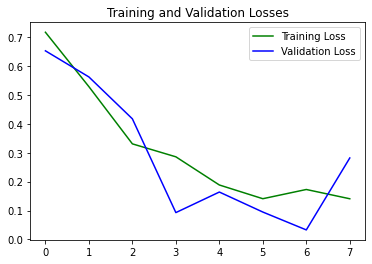

In [14]:
plt.plot(hist.history['loss'],'g',label="Training Loss")
plt.plot(hist.history['val_loss'],'b',label="Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

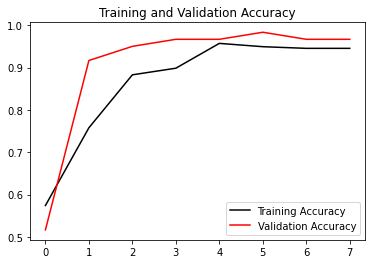

In [15]:
plt.plot(hist.history['accuracy'],'black',label="Training Accuracy")
plt.plot(hist.history['val_accuracy'],'r',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

## Test Images

In [16]:
print(train_generator.class_indices)
y_actual = []
y_test = []

{'Covid': 0, 'Normal': 1}


In [17]:
for i in os.listdir("Dataset/CovidDataset/Val/Normal/"):
    img = image.load_img("Dataset/CovidDataset/Val/Normal/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [18]:
for i in os.listdir("Dataset/CovidDataset/Val/Covid/"):
    img = image.load_img("Dataset/CovidDataset/Val/Covid/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

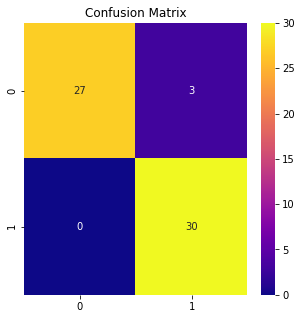

In [19]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

plt.figure(figsize=(5,5))
cm = confusion_matrix(y_actual, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.title("Confusion Matrix")
plt.show()